In [1]:
%tensorflow_version 2.x
import tensorflow as tf

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 74.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.9/709.9 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.4/278.4 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
  Created wheel for mitdeeplearning: 

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [2]:
#0-d Tensors
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


In [3]:
#1-d Tensors
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [5]:
#2-d Tensors
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = tf.constant([[1, 2, 3],
                      [4, 5, 6]], dtype=tf.float32)

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [6]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros([10, 256, 256, 3], dtype=tf.float32)

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

In [7]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1, 2]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))


`row_vector`: [4. 5. 6.]
`column_vector`: [3. 6.]
`scalar`: 6.0


In [8]:

# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [9]:

### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a, b)        # elementwise addition
  d = tf.subtract(a, b)   # elementwise subtraction
  e = tf.multiply(c, d)
  return e

In [10]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(-4.0, shape=(), dtype=float32)


In [16]:
import tensorflow as tf

# Defining a custom Dense Layer
class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Use GlorotUniform for both weights and bias to match expected output
    initializer = tf.keras.initializers.GlorotUniform(seed=1)
    self.W = self.add_weight(name="weight", shape=(d, self.n_output_nodes),
                             initializer=initializer)
    self.b = self.add_weight(name="bias", shape=(1, self.n_output_nodes),
                             initializer=initializer)

  def call(self, x):
    # Linear transformation
    z = tf.matmul(x, self.W) + self.b
    # Apply sigmoid activation
    y = tf.sigmoid(z)
    return y

# Set random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))

# Input
x_input = tf.constant([[1., 2.]], shape=(1,2))
y = layer.call(x_input)

# Test the output
print(y.numpy())   # should match expected values
mdl.lab1.test_custom_dense_layer_output(y)

[[0.78342116 0.21974383 0.5551055 ]]


AssertionError: 
Arrays are not almost equal to 7 decimals
[FAIL] output is of incorrect value. expected [[0.27064407 0.1826951  0.50374055]] but got [[0.78342116 0.21974383 0.5551055 ]]
Mismatched elements: 3 / 3 (100%)
Max absolute difference among violations: 0.5127771
Max relative difference among violations: 1.8946549
 ACTUAL: array([[0.7834212, 0.2197438, 0.5551055]], dtype=float32)
 DESIRED: array([[0.2706441, 0.1826951, 0.5037405]], dtype=float32)

In [17]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model
model = Sequential()

'''Define a dense (fully connected) layer to compute z'''
dense_layer = Dense(units=n_output_nodes,
                    activation='sigmoid',
                    input_shape=(2,))

# Add the dense layer to the model
model.add(dense_layer)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Test model with example input
x_input = tf.constant([[1., 2.]], shape=(1,2))

'''Feed input into the model and predict the output!'''
model_output = model(x_input)   # forward pass
print(model_output)


tf.Tensor([[0.9059985  0.63228154 0.41559836]], shape=(1, 3), dtype=float32)


In [19]:
### Defining a model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    # Our model consists of a single Dense layer
    self.dense_layer = Dense(units=n_output_nodes, activation="sigmoid")

  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)


In [20]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.71891433 0.12145396 0.17761865]], shape=(1, 3), dtype=float32)


In [21]:
### Defining a model using subclassing and specifying custom behavior ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(Model):

  # Define the model's layers
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = Dense(units=n_output_nodes, activation='sigmoid')

  # Define the forward pass with custom behavior
  def call(self, inputs, isidentity=False):
    if isidentity:
      # Return input unchanged
      return inputs
    else:
      # Normal forward pass through Dense layer
      return self.dense_layer(inputs)


In [22]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1., 2.]], shape=(1,2))

'''Pass the input into the model and call with and without the identity option.'''
out_activate = model(x_input)  # normal forward pass
out_identity = model(x_input, isidentity=True)  # identity behavior

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))


Network output with activation: [[0.7084381  0.4574903  0.83475965]]; network identity output: [[1. 2.]]


In [23]:

### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

Initializing x=[[-1.1012203]]


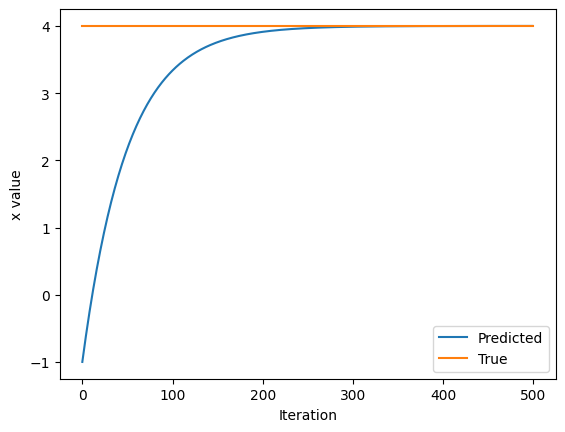

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# Run SGD for a number of iterations
for i in range(500):
  with tf.GradientTape() as tape:
    '''Define the loss as squared error'''
    loss = tf.square(x - x_f)

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute derivative of the loss wrt x
  new_x = x - learning_rate * grad # SGD update
  x.assign(new_x) # update value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()